# Contents
- [Importing libraries and data](#Importing-libraries-and-data)
- [Initial EDA and data cleaning](#Initial-EDA-and-data-cleaning)
- [Creating a pipeline for the customer data](#Creating-a-pipeline-for-the-customer-data)

# Customer Ananlysis
### *This is a demo project of showcasing data wrangling techniques*

## Importing libraries and data
*First we import all the required libraries and initializing a class for highlighting purposes. We are going to define and check every step as a function to build a data processing pipeline* **==>**

[back to top](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from matplotlib import pyplot as plt 
%matplotlib inline

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

*Then we load the data and peek into. This time the data is saved as 3 individual .csv files* **==>**

In [2]:
df1 = pd.read_csv('data/file1.csv')
df1.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [3]:
df2 = pd.read_csv('data/file2.csv')
df2.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.6,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.2,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.6,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.2,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.2,Corporate Auto,Two-Door Car


In [4]:
df3 = pd.read_csv('data/file3.csv')
df3.head()

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV


*Now we are checking the shape and column names of the 3 files. There are some incosistent naming amongst the columns. This will be dealt with before concatenating them for the EDA* **==>** 

In [5]:
# to highlight if the shape of all files are compatible
print(f'{color.UNDERLINE}{str(df1.shape[1] == df2.shape[1] == df3.shape[1])}{color.END}')

# substracting the intersection of sets from the their union will give us the inconsistent column names
print((set(df1.columns)|set(df2.columns)|set(df3.columns))-(set(df1.columns)&set(df2.columns)&set(df3.columns)))

True
{'ST', 'Gender', 'State', 'GENDER'}


*now we can unify the column names* **==>**

In [6]:
df1.rename(columns={'ST':'State', 'GENDER':'Gender', }, inplace=True)
df2.rename(columns={'ST':'State', 'GENDER':'Gender', }, inplace=True)

*concataneting the 3 files and checking the result* **==>**

In [7]:
df = pd.concat([df1, df2, df3]).reset_index(drop=True)
df.head(10)

,Customer,State,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,Bachelor,825629.78%,62902.0,69.0,1/0/00,Personal Auto,Two-Door Car,159.383042
6,XZ87318,Oregon,F,College,538089.86%,55350.0,67.0,1/0/00,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,M,Master,721610.03%,0.0,101.0,1/0/00,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,M,Bachelor,2412750.40%,14072.0,71.0,1/0/00,Corporate Auto,Four-Door Car,511.200000
9,BQ94931,Oregon,F,College,738817.81%,28812.0,93.0,1/0/00,Special Auto,Four-Door Car,425.527834


## Initial EDA and data cleaning

*First let`s do some standardizing for easier reference* **==>**

[back to top](#Contents)

In [8]:
# changing all columns to lower case and into a consistent format
df.columns = (df.columns
              .str.lower()
              .str.replace(' ','_'))
df.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


*The customer columns is not holding any descriptive value for our analysis thus we remove it* **==>**

In [9]:
df.drop(columns='customer', inplace=True)
df.head()

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


*Now we only have columns holding valuable information, we look at possible empty rows* **==>**

In [10]:
df.isna().sum()

state                        2937
gender                       3059
education                    2937
customer_lifetime_value      2944
income                       2937
monthly_premium_auto         2937
number_of_open_complaints    2937
policy_type                  2937
vehicle_class                2937
total_claim_amount           2937
dtype: int64

*We have a minimum of 2937 NaN values in every column, which indicates a lot of completely empty rows.
To deal with this situation we delete the rows where ALL values are null.* **==>**

In [11]:
df.dropna(how='all', inplace=True)
# quickly reset the index to reorganize them after the NaN purge
df.reset_index(drop=True, inplace=True)
df.isna().sum()

state                          0
gender                       122
education                      0
customer_lifetime_value        7
income                         0
monthly_premium_auto           0
number_of_open_complaints      0
policy_type                    0
vehicle_class                  0
total_claim_amount             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9137 entries, 0 to 9136
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   customer_lifetime_value    9130 non-null   object 
 4   income                     9137 non-null   float64
 5   monthly_premium_auto       9137 non-null   float64
 6   number_of_open_complaints  9137 non-null   object 
 7   policy_type                9137 non-null   object 
 8   vehicle_class              9137 non-null   object 
 9   total_claim_amount         9137 non-null   float64
dtypes: float64(3), object(7)
memory usage: 714.0+ KB


*Now that we don`t have empty rows anymore, we can explore the data further* **==>**

In [13]:
df.nunique()

state                           8
gender                          5
education                       6
customer_lifetime_value      8211
income                       5655
monthly_premium_auto          209
number_of_open_complaints      12
policy_type                     3
vehicle_class                   6
total_claim_amount           5070
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,9137.0,37828.820291,30358.716159,0.000000,0.000000,34244.000000,62447.000000,99981.000000
monthly_premium_auto,9137.0,110.391266,581.376032,61.000000,68.000000,83.000000,109.000000,35354.000000
total_claim_amount,9137.0,430.527140,289.582968,0.099007,266.996814,377.561463,546.420009,2893.239678


In [15]:
for c in df.columns:
    print(df[c].value_counts(dropna=False), '\n\n')

California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: state, dtype: int64 


F         4560
M         4368
NaN        122
Male        40
female      30
Femal       17
Name: gender, dtype: int64 


Bachelor                2719
College                 2682
High School or Below    2616
Master                   752
Doctor                   344
Bachelors                 24
Name: education, dtype: int64 


NaN             7
4984.618655     6
25464.820590    6
5246.278375     6
22332.439460    6
               ..
7477.176362     1
15700.284360    1
2968.077571     1
5452.171237     1
2611.836866     1
Name: customer_lifetime_value, Length: 8212, dtype: int64 


0.0        2294
95697.0      13
26876.0       8
61108.0       8
10621.0       8
           ... 
26599.0       1
75774.0       1
85412.0       1
42968.0       1
21941.0       1
Name: income, Length: 5655, dtype: int64 


65.0     351


*The initial insight shows further irregularities, such as multiple aliases in the **state** column, the **gender** column has too many unique values and the **income** column contains many 0 values which can be considered as NaN and need to be dealt with. There are minor inconsistencies in other columns as well*

*Let`s deal with these problems step-by-step* **==>**

In [16]:
# cleaning the state column
df['state'].value_counts(dropna=False)

California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: state, dtype: int64

In [17]:
df['state'].replace({'Cali':'California', 'AZ':'Arizona', 'WA':'Washington'}, inplace=True)
df['state'].value_counts()

California    3152
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: state, dtype: int64

In [18]:
df['gender'].value_counts()

F         4560
M         4368
Male        40
female      30
Femal       17
Name: gender, dtype: int64

*Doing the same to the **gender** and **education** column and also filling missing data with* **Unknown**==>**

In [19]:
df['gender'] = df['gender'].replace({'F':'Female', 'M':'Male', 'female':'Female', 'Femal':'Female'}).fillna('Unknown')
df['gender'].value_counts()

Female     4607
Male       4408
Unknown     122
Name: gender, dtype: int64

In [20]:
df['education'].value_counts(dropna=False)

Bachelor                2719
College                 2682
High School or Below    2616
Master                   752
Doctor                   344
Bachelors                 24
Name: education, dtype: int64

In [21]:
df['education'].replace('Bachelors','Bachelor', inplace=True)
df['education'].value_counts()

Bachelor                2743
College                 2682
High School or Below    2616
Master                   752
Doctor                   344
Name: education, dtype: int64

*It is time to deal with other types of inconsistent inputs too* **==>**

In [22]:
df.dtypes

state                         object
gender                        object
education                     object
customer_lifetime_value       object
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

*The **customer_lifetime_value** is a key metric in our analysis, however it should be a numeric column and also missing values* **==>**

In [23]:
df['customer_lifetime_value'].unique()

array([nan, '697953.59%', '1288743.17%', ..., 8163.890428, 7524.442436,
       2611.836866], dtype=object)

*Looks like we have many **%** special characters, we ought to remove them first before the conversion* **==>**

In [24]:
df['customer_lifetime_value'] = pd.to_numeric(df['customer_lifetime_value']
                                              .apply(lambda x: x.strip('%') if isinstance(x, str) else x)
                                             )

*The **income** column has **0** as value in many rows, these can be treated as NaN values and imputed later* **==>** 

<AxesSubplot:>

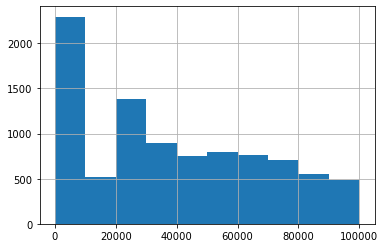

In [25]:
df['income'].hist()

In [26]:
df['income'].replace(0, np.nan, inplace=True)
df[df['income']==0].size # to confirm that there are no zero values left

0

*We continue with the **monthly_premium_auto** column. Which seems to have a good integrity **==>**

In [27]:
df['monthly_premium_auto'] = df['monthly_premium_auto'].astype(int)
df['monthly_premium_auto'].value_counts()

65     351
66     312
71     304
73     303
63     290
      ... 
178      1
204      1
281      1
275      1
286      1
Name: monthly_premium_auto, Length: 209, dtype: int64

In [28]:
df['monthly_premium_auto'].isna().sum()

0

*It is time to standardize the **number_of_open_complaints** column. We need to extract the middle number* **==>**

In [29]:
df['number_of_open_complaints'].value_counts()

0         5629
1/0/00    1626
1          765
2          283
1/1/00     247
3          230
4          119
1/2/00      93
1/3/00      60
5           44
1/4/00      29
1/5/00      12
Name: number_of_open_complaints, dtype: int64

In [30]:
df['number_of_open_complaints'] = df['number_of_open_complaints'].astype(str)

In [31]:
df['number_of_open_complaints'] = (list(map(lambda x: x[0] if len(x) < 3 else x[1], 
                                            df['number_of_open_complaints']
                                            .astype(str)
                                            .str.split('/')))
                                  )  
df['number_of_open_complaints'].value_counts()

0    7255
1    1012
2     376
3     290
4     148
5      56
Name: number_of_open_complaints, dtype: int64

*We can change to the correct data type later down the pipeline along with the rest of the columns. Now we take the next column* **policy_type ==>**

In [32]:
df['policy_type'].value_counts()

Personal Auto     6792
Corporate Auto    1965
Special Auto       380
Name: policy_type, dtype: int64

In [33]:
df['policy_type'].isna().sum()

0

*Looks like this column is in order, let's continue to* **vehicle_class ==>**

In [34]:
df['vehicle_class'].value_counts()

Four-Door Car    4641
Two-Door Car     1896
SUV              1774
Sports Car        483
Luxury SUV        182
Luxury Car        161
Name: vehicle_class, dtype: int64

In [35]:
df['vehicle_class'].isna().sum()

0

*No anomalies here, let`s check the last column* **total_claim_amount ==>**

In [36]:
df['total_claim_amount'].isna().sum()

0

*Another column with no missing value. We are doing a last check, then set all the columns to the right data type. Since many columns has a limited number of unique values, it is more efficent to convert these to **categorical** datatype. Next we are setting a threshold for unique values and convert every object type to categorical below it* **==>** 

In [37]:
df.dtypes

state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto           int32
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [38]:
# filtering for the columns having a maximum of 5 distinct values 
columns_to_cat = list(df.nunique()[df.nunique() <=5].index)
df[columns_to_cat]

,state,gender,education,policy_type
0,Washington,Unknown,Master,Personal Auto
1,Arizona,Female,Bachelor,Personal Auto
2,Nevada,Female,Bachelor,Personal Auto
3,California,Male,Bachelor,Corporate Auto
4,Washington,Male,High School or Below,Personal Auto
...,...,...,...,...
9132,California,Male,Bachelor,Personal Auto
9133,California,Female,College,Corporate Auto
9134,California,Male,Bachelor,Corporate Auto
9135,California,Male,College,Personal Auto


In [39]:
df[columns_to_cat] = df[columns_to_cat].astype('category')
df.dtypes

state                        category
gender                       category
education                    category
customer_lifetime_value       float64
income                        float64
monthly_premium_auto            int32
number_of_open_complaints      object
policy_type                  category
vehicle_class                  object
total_claim_amount            float64
dtype: object

*Next we change the rest of the columns. However, since NaN values are represented as floats, first we have to do the imputaion then we can convert the remaining floats as integers, since we do not lose any descriptive value.* **==>** 

In [40]:
df.isna().sum()

state                           0
gender                          0
education                       0
customer_lifetime_value         7
income                       2294
monthly_premium_auto            0
number_of_open_complaints       0
policy_type                     0
vehicle_class                   0
total_claim_amount              0
dtype: int64

*We are going to use **IterativeImputer** from the **scikit learn library**. This library is using modeling to estimate the missing values based on their relation to values in other rows with no missing values respectively. We only have a significant amount of missing value in the **income** column and have nearly intact data in the rest, using a model to estimate the missing income values most likely yields a better estimate then using a simple statistic strategy, like the columns mean. However we can still measure the performance-difference later when modeling* **==>**

In [41]:
# as first step we subset the columns to be imputed
cols_to_impute = df[['customer_lifetime_value','income']].columns
# then we initialize the imputer object with minimum and maximum values of the aforementioned columns
imputer = IterativeImputer(min_value=df[cols_to_impute].min(), max_value=df[cols_to_impute].max())
# now we can fit the iterative model and transform the estimation into a numpy array of imputing values
impute_values = imputer.fit_transform(df[cols_to_impute])
# finally assign the array to the columns to replace the missing values
df[cols_to_impute] = impute_values

In [42]:
df.isna().sum()

state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

<AxesSubplot:>

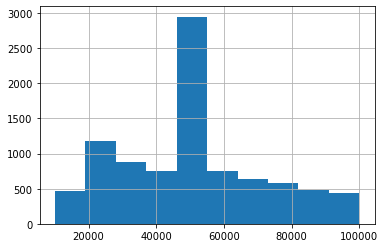

In [43]:
df['income'].hist()

*As a final step we can change the rest of the incorrect data types* **==>**

In [44]:
df.astype({'customer_lifetime_value':int, 'income':int, 'number_of_open_complaints':int, 'total_claim_amount':int})

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,Unknown,Master,182194,50497,1000,0,Personal Auto,Four-Door Car,2
1,Arizona,Female,Bachelor,697953,51151,94,0,Personal Auto,Four-Door Car,1131
2,Nevada,Female,Bachelor,1288743,48767,108,0,Personal Auto,Two-Door Car,566
3,California,Male,Bachelor,764586,51236,106,0,Corporate Auto,SUV,529
4,Washington,Male,High School or Below,536307,36357,68,0,Personal Auto,Four-Door Car,17
...,...,...,...,...,...,...,...,...,...,...
9132,California,Male,Bachelor,23405,71941,73,0,Personal Auto,Four-Door Car,198
9133,California,Female,College,3096,21604,79,0,Corporate Auto,Four-Door Car,379
9134,California,Male,Bachelor,8163,50277,85,3,Corporate Auto,Four-Door Car,790
9135,California,Male,College,7524,21941,96,0,Personal Auto,Four-Door Car,691


## Creating a pipeline for the customer data
*Now that we have the cleaning process verifed, we can create a straightfoward pipeline for data processing* **==>**

[back to top](#Contents)

In [45]:
def load_data(file1='data/file1.csv', file2='data/file2.csv', file3='data/file3.csv'):
    '''Takes 3 filepaths as arguments, returning a concataneted dataframe with standardized column names'''
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    df3 = pd.read_csv(file3)
    df1.rename(columns={'ST':'State', 'GENDER':'Gender', }, inplace=True)
    df2.rename(columns={'ST':'State', 'GENDER':'Gender', }, inplace=True)
    df = pd.concat([df1, df2, df3]).reset_index(drop=True)
    df.columns = (df.columns
                  .str.lower()
                  .str.replace(' ','_')
                  )
    df.drop(columns='customer', inplace=True)
    df.dropna(how='all', inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

def data_cleaner(df):
    '''Takes a dataframe as argument and returns it with standardized values'''
    df['state'].replace({'Cali':'California', 'AZ':'Arizona', 'WA':'Washington'}, inplace=True)
    df['gender'] = (df['gender']
                    .replace({'F':'Female', 'M':'Male', 'female':'Female', 'Femal':'Female'})
                    .fillna('Unknown')
                    )
    df['education'].replace('Bachelors','Bachelor', inplace=True)
    df['customer_lifetime_value'] = pd.to_numeric(df['customer_lifetime_value']
                                                 .apply(lambda x: x.strip('%') if isinstance(x, str) else x)
                            )
    df['income'].replace(0,np.nan, inplace=True)
    df['number_of_open_complaints'] = (list(map(lambda x: x[0] if len(x) < 3 else x[1], 
                                       df['number_of_open_complaints']
                                       .astype(str)
                                       .str.split('/')))
                                       )
    return df
    
def imputer(df):
    '''Returns the imputed version of the dataframe passed in'''
    cols_to_impute = df[['customer_lifetime_value','income']].columns
    imputer = IterativeImputer(min_value=df[cols_to_impute].min(), max_value=df[cols_to_impute].max())
    impute_values = imputer.fit_transform(df[cols_to_impute])
    df[cols_to_impute] = impute_values
    return df
    
def dtype_transformer(df):
    '''Returns the dataframe passed in with fixed data types'''
    clean_df = df.astype({'state':'category', 'gender':'category', 'education':'category', 
                          'customer_lifetime_value':'int32', 'income':'int32', 
                          'monthly_premium_auto': 'int32',
                          'number_of_open_complaints':'int32', 'policy_type':'category', 
                          'vehicle_class':'category', 'total_claim_amount':'int32'
                          }
                         )
    return clean_df

In [46]:
def pipeline_control():
    '''A Data processing pipeline designed for the customer analysis data structure. 
    Takes the filepaths and returns cleaned and imputed data for further analysis/modeling'''
    df = load_data()
    data_cleaner(df)
    imputer(df)
    clean_df = dtype_transformer(df)
    return clean_df

## Result of the pipeline created

[back to top](#Contents)

*Now that the data is transformed into a clean and lossless form we can begin the in-depth EDA including visualization. We begin the proccess with some summary statistics.* **==>**

In [47]:
clean_df = pipeline_control()
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9137.0,182193.523367,440881.274313,1898.0,4650.0,7720.0,26220.0,5816655.0
income,9137.0,50497.801357,21022.161223,10037.0,34337.0,50274.0,62447.0,99981.0
monthly_premium_auto,9137.0,110.391266,581.376032,61.0,68.0,83.0,109.0,35354.0
number_of_open_complaints,9137.0,0.383715,0.908988,0.0,0.0,0.0,0.0,5.0
total_claim_amount,9137.0,430.060523,289.598737,0.0,266.0,377.0,546.0,2893.0


In [48]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9137 entries, 0 to 9136
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   state                      9137 non-null   category
 1   gender                     9137 non-null   category
 2   education                  9137 non-null   category
 3   customer_lifetime_value    9137 non-null   int32   
 4   income                     9137 non-null   int32   
 5   monthly_premium_auto       9137 non-null   int32   
 6   number_of_open_complaints  9137 non-null   int32   
 7   policy_type                9137 non-null   category
 8   vehicle_class              9137 non-null   category
 9   total_claim_amount         9137 non-null   int32   
dtypes: category(5), int32(5)
memory usage: 224.1 KB


### This is the end of the data wrangling showcase, please check out my other demo projects too:
- [Data visualization and EDA](#)
- [Linear modeling](#)

[Back to top](#Contents)
